# **Main implementation**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 01/10/2022*

*Last updated: 27/11/2022*

---

In [19]:
# Function that configures the storage
from fragments.functions.storage_configuration import configure_storage

# Function that transforms the dataset **for the modelling**
from fragments.functions.transform_model import transform_df_model

# Function that transforms the dataset **for the prediction**
from fragments.functions.transform_prediction import transform_df_predict

# Function that trains the model mlp
from fragments.functions.model_mlp import train_mlp

# Function that trains the model decision tree
from fragments.functions.model_decision_tree import train_decision_tree

# Function that trains the model decision tree
from fragments.functions.model_logistic_regression import train_logistic_regression

# Function that trains the model decision tree
from fragments.functions.model_random_forest import train_random_forest

In [20]:
# Importing the necessary libraries
import pandas as pd
from joblib import load, dump

*THESE VARIABLES MUST BE GIVEN BY THE USER, PLEASE EDIT TO USE*

In [21]:
# Defining the file to use
dataset_path = 'C:\\Users\\myros\\Documents\\7mo_Semestre_Period2\\Reto\\TC3007C_AI\\datasets_prueba\\WA_Fn-UseC_-Telco-Customer-Churn.csv'
original_name_dataset = 'WA_Fn-UseC_-Telco-Customer-Churn'
target_column_name = 'Churn'

### ***Storage configuration***

In [22]:
configure_storage(dataset_path, original_name_dataset)

---

### ***Data preparation***

In [23]:
transform_df_model(original_name_dataset, target_column_name)

In [24]:
# Loading the model|
general_aspects_df = load(f'./fragments/joblibs/{original_name_dataset}/etl/general_aspects_original.joblib')
general_aspects_df

,total,number_churn,number_no_churn,percentage_churn,percentage_no_churn
0,2219,25,2194,1.126634,98.873366


---
### ***Model training and Evaluation***

*THIS VARIABLE MUST BE GIVEN BY THE USER, PLEASE EDIT TO USE*

In [25]:
# Define if the model is using SMOTE algorithm
smote = False

#### *MLP*

Printing the K-fold Cross Validation


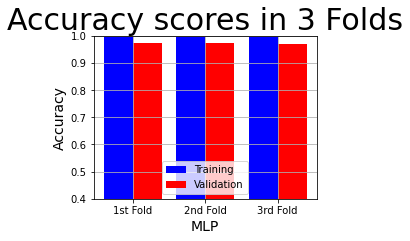

MSE Train: 0.003861003861003861
Accuracy Train: 0.9961389961389961
MSE Test: 0.081203007518797
Accuracy Test: 0.9187969924812031


In [26]:
confussion_matrix, mlp_results = train_mlp(target_column_name, original_name_dataset, smote)

In [27]:
confussion_matrix

,0,1
0,609,51
1,3,2


In [28]:


true_predicted_percentage = load(f'./fragments/joblibs/{original_name_dataset}/model/mlp/true_predicted_percentage.joblib')
true_predicted_percentage

,predicted_true_positive_percentage,predicted_true_negative_percentage
0,0.037736,0.995098


#### *Decision Tree*

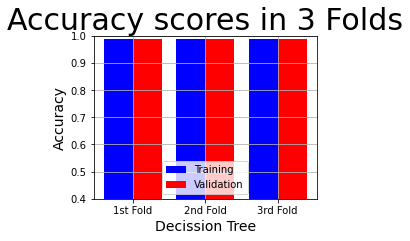

MSE Train: 0.01287001287001287
Accuracy Train: 0.9871299871299871
MSE Test: 0.007518796992481203
Accuracy Test: 0.9924812030075187


In [29]:
confussion_matrix, decision_tree_results = train_decision_tree(target_column_name, original_name_dataset, smote)

In [30]:
confussion_matrix

,0,1
0,660,5
1,0,0


In [31]:


true_predicted_percentage = load(f'./fragments/joblibs/{original_name_dataset}/model/decission_tree/true_predicted_percentage.joblib')
true_predicted_percentage


,predicted_true_positive_percentage,predicted_true_negative_percentage
0,0.0,1.0


#### *Logistic Regression*

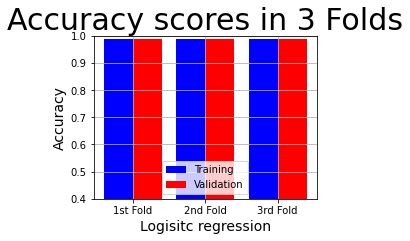

MSE Train: 0.01287001287001287
Accuracy Train: 0.9871299871299871
MSE Test: 0.009022556390977444
Accuracy Test: 0.9909774436090225


In [32]:
confussion_matrix, logistic_tree_results = train_logistic_regression(target_column_name, original_name_dataset, smote)

In [33]:
confussion_matrix

,0,1
0,659,1
1,5,0


In [34]:


true_predicted_percentage = load(f'./fragments/joblibs/{original_name_dataset}/model/benchmark/true_predicted_percentage.joblib')
true_predicted_percentage



,predicted_true_positive_percentage,predicted_true_negative_percentage
0,0.0,0.99247


#### *Random Forest*

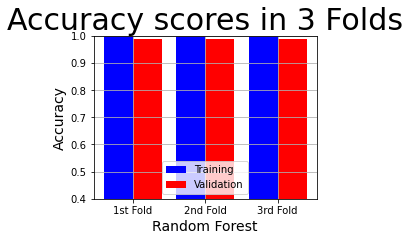

MSE Train: 0.0045045045045045045
Accuracy Train: 0.9954954954954955
MSE Test: 0.007518796992481203
Accuracy Test: 0.9924812030075187


In [35]:
confussion_matrix, random_forest_results = train_random_forest(target_column_name, original_name_dataset, smote)

In [36]:
confussion_matrix

,0,1
0,660,5
1,0,0


In [37]:


true_predicted_percentage = load(f'./fragments/joblibs/{original_name_dataset}/model/benchmark/true_predicted_percentage.joblib')
true_predicted_percentage



,predicted_true_positive_percentage,predicted_true_negative_percentage
0,0.0,0.99247
